In [1]:
%%javascript
$('<div id="toc"></div>').css({position: 'fixed', top: '120px', left: 0}).appendTo(document.body);
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');

<IPython.core.display.Javascript object>

**Plate description**:\
Plate number 521\
Strain: C2\
Crossdate: 04/01/23\
Prince position: 2\
Extract date: 9th Jan 2023\
PRINCE FULL DATA: 20230109_1409_Plate02

In [2]:
import sys
import matplotlib.pyplot as plt
sys.path.append("/Users/kai/Downloads/graduation/final_git/MasterThesis/src/")
from make_dataset import *
from config import *
from model import *

/Users/kai/Downloads/graduation/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
segment = get_labelme_segments(labelme_path+"20230104_Plate521")

In [4]:
width_dict,width_std_dict= compute_width_from_segment(segment)

In [5]:
print("The total positions I took are 76, and each position I extract at least 1 edges.\n\
To minimize the bias I compute at least 3 segment." + f"Final number of groundtruth: {len(width_dict)}")

The total positions I took are 76, and each position I extract at least 1 edges.
To minimize the bias I compute at least 3 segment.Final number of groundtruth: 76


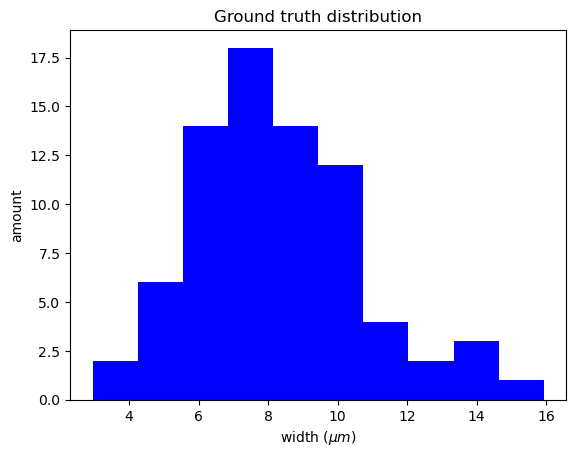

In [6]:
width = [i*2 for i in list(width_dict.values())]
plt.hist(width,color="blue")
plt.title("Ground truth distribution")
plt.xlabel("width ($\mathit{\mu m}$)")
plt.ylabel("amount")
plt.show()

**Plate description**:\
Plate number 521\
Strain: C2\
Crossdate: 04/01/23\
Prince position: 2\
Extract date: 11th Jan 2023\
PRINCE FULL DATA: 20230111_1349_Plate02

In [7]:
segment2 = get_labelme_segments(labelme_path+"20230104_Plate521_2")
width_dict2,width_std_dict2= compute_width_from_segment(segment2)

In [8]:
print("The total positions I took are 50, and each position I extract at least 1 edges.\n\
To minimize the bias I compute at least 3 segment." + f"Final number of groundtruth: {len(width_dict2)}")

The total positions I took are 50, and each position I extract at least 1 edges.
To minimize the bias I compute at least 3 segment.Final number of groundtruth: 50


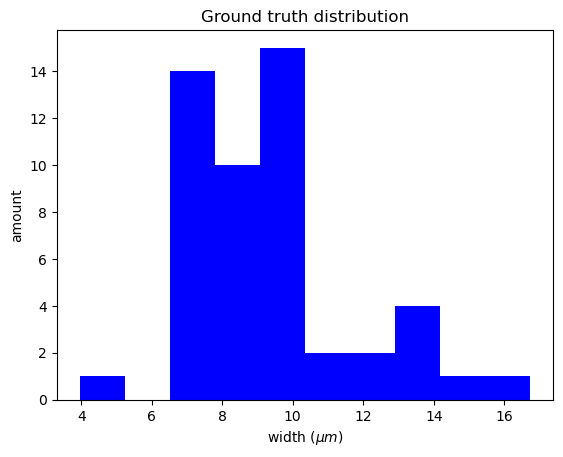

In [9]:
width2 = [i*2 for i in list(width_dict2.values())]
plt.hist(width2,color="blue")
plt.title("Ground truth distribution")
plt.xlabel("width ($\mathit{\mu m}$)")
plt.ylabel("amount")
plt.show()

In [10]:
dif = {}
for key in width_dict2.keys():
    exp1 = width_dict[key]*2
    exp2 = width_dict2[key]*2
    dif[key] = exp2-exp1
hyphae1 = []
label = []
for i in range(len(dif)+1):
    for key, value in dif.items():
        if i == int(key[3:]):
            hyphae1.append(value)
            label.append(key)

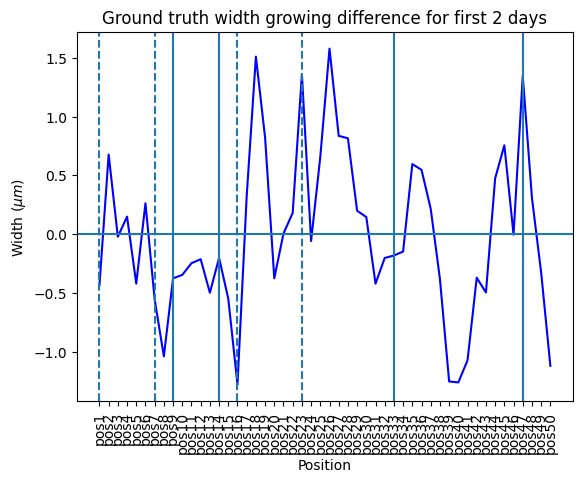

In [66]:
plt.plot(hyphae1,color="blue")
plt.xticks(np.arange(0,len(label),1),labels=label,rotation = 90)
plt.title("Ground truth width growing difference for first 2 days")
plt.xlabel("Position")
plt.ylabel("Width ($\mathit{\mu m}$)")
plt.axhline(0,xmin=0,xmax=50)
plt.axvline( 0,linestyle="--",label="tip - bottom")
plt.axvline( 6,linestyle="--")
plt.axvline( 8,linestyle="-" ,label="bottom - tip")
plt.axvline(13,linestyle="-")
plt.axvline(15,linestyle="--")
plt.axvline(22,linestyle="--")
plt.axvline(32,linestyle="-")
plt.axvline(46,linestyle="-")
plt.savefig("plot_data/width growing/20230104_Plate521_11-9.png")

In [67]:
count = 0
for i in range(len(hyphae1)):
    if hyphae1[i] < 0 :
        count+=1
print(count," position decrease the width")
print(50-count," position increase the width")

28  position decrease the width
22  position increase the width


**Plate description**:\
Plate number 521\
Strain: C2\
Crossdate: 04/01/23\
Prince position: 2\
Extract date: 13th Jan 2023\
PRINCE FULL DATA: 20230113_0949_Plate02

In [12]:
segment3 = get_labelme_segments(labelme_path+"20230104_Plate521_3")
width_dict3,width_std_dict3= compute_width_from_segment(segment3)

In [13]:
print("The total positions I took are 50, and each position I extract at least 1 edges.\n\
To minimize the bias I compute at least 3 segment." + f"Final number of groundtruth: {len(width_dict3)}")

The total positions I took are 50, and each position I extract at least 1 edges.
To minimize the bias I compute at least 3 segment.Final number of groundtruth: 50


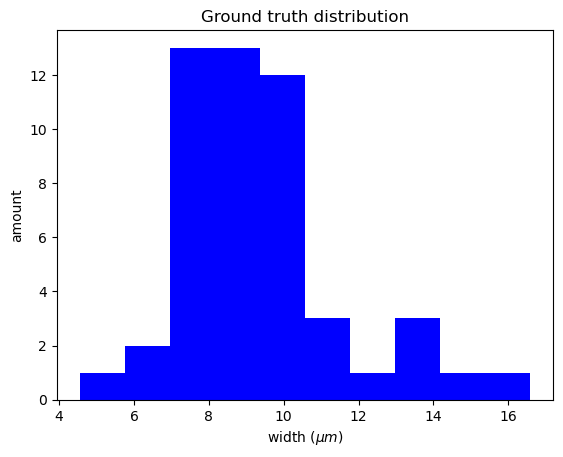

In [14]:
width3 = [i*2 for i in list(width_dict3.values())]
plt.hist(width3,color="blue")
plt.title("Ground truth distribution")
plt.xlabel("width ($\mathit{\mu m}$)")
plt.ylabel("amount")
plt.show()

In [ ]:
dif = {}
for key in width_dict3.keys():
    exp1 = width_dict2[key] * 2
    exp2 = width_dict3[key] * 2
    dif[key] = exp2-exp1
hyphae2 = []
label = []
for i in range(len(dif)+1):
    for key, value in dif.items():
        if i == int(key[3:]):
            hyphae2.append(value)
            label.append(key)

In [ ]:
import numpy as np
print(np.mean(hyphae2))
print(np.std(hyphae2))

0.07823259757917159
0.6913677716684914


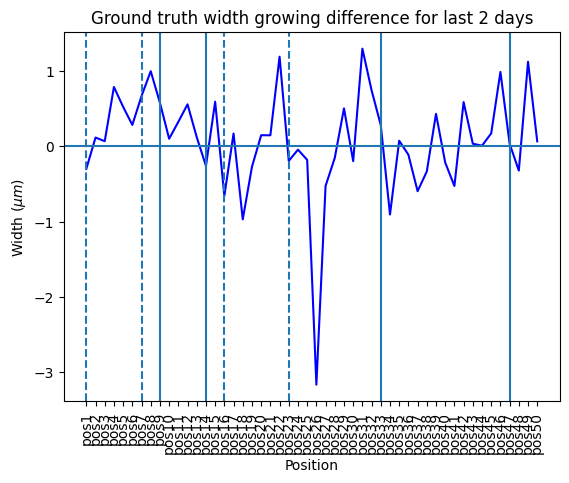

In [43]:
plt.plot(hyphae2,color="blue")
plt.xticks(np.arange(0,len(label),1),labels=label,rotation = 90)
plt.title("Ground truth width growing difference for last 2 days")
plt.xlabel("Position")
plt.axhline( 0,xmin=0,xmax=50)
plt.axvline( 0,linestyle="--",label="tip - bottom")
plt.axvline( 6,linestyle="--")
plt.axvline( 8,linestyle="-" ,label="bottom - tip")
plt.axvline(13,linestyle="-")
plt.axvline(15,linestyle="--")
plt.axvline(22,linestyle="--")
plt.axvline(32,linestyle="-")
plt.axvline(46,linestyle="-")
plt.ylabel("Width ($\mathit{\mu m}$)")
plt.savefig("plot_data/width growing/20230104_Plate521_13-11.png")

In [ ]:
count = 0
for i in range(len(hyphae2)):
    if hyphae2[i] < 0 :
        count+=1
print(count," position decrease the width")
print(50-count," position increase the width")

19  position decrease the width
31  position increase the width


In [ ]:
### dif = {}
for key in width_dict3.keys():
    exp1 = width_dict[key] * 2
    exp2 = width_dict3[key] * 2
    dif[key] = exp2-exp1
hyphae3 = []
label = []
for i in range(len(dif)+1):
    for key, value in dif.items():
        if i == int(key[3:]):
            hyphae3.append(value)
            label.append(key)

In [ ]:
import numpy as np
print(np.mean(hyphae3))
print(np.std(hyphae3))

0.07709291397226989
0.7647757537742125


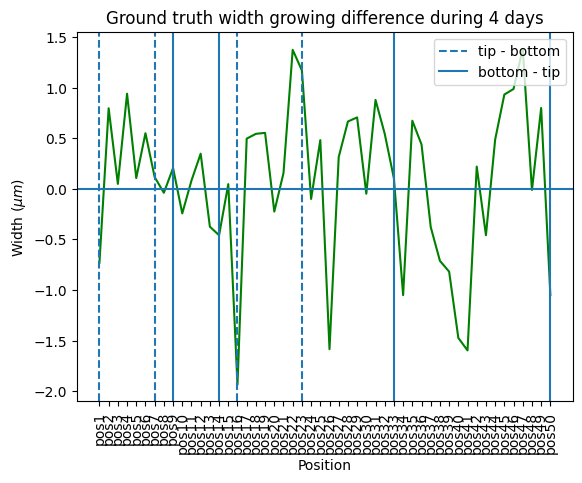

In [ ]:
# plt.plot(hyphae1,color="blue")
# plt.plot(hyphae2,color="red")
plt.plot(hyphae3,color="green")
plt.xticks(np.arange(0,len(label),1),labels=label,rotation = 90)
plt.title("Ground truth width growing difference during 4 days")
plt.xlabel("Position")
plt.axhline(0,xmin=0,xmax=50)
plt.axvline( 0,linestyle="--",label="tip - bottom")
plt.axvline( 6,linestyle="--")
plt.axvline( 8,linestyle="-" ,label="bottom - tip")
plt.axvline(13,linestyle="-")
plt.axvline(15,linestyle="--")
plt.axvline(30,linestyle="--")
plt.axvline(32,linestyle="-")
plt.axvline(49,linestyle="-")
plt.legend()
plt.ylabel("Width ($\mathit{\mu m}$)")
plt.savefig("plot_data/width growing/20230104_Plate521_13-9.png")

In [39]:
count = 0
for i in range(len(hyphae3)):
    if hyphae3[i] < 0 :
        count+=1
print(count," position decrease the width")
print(50-count," position increase the width")

19  position decrease the width
31  position increase the width


**Plate description**:\
Plate number 493\
Strain: Agg\
Crossdate: 06/12/23\
Prince position: 24\
Extract date: 11th Jan 2023\
PRINCE FULL DATA: 

In [15]:
segment = get_labelme_segments(labelme_path+"20230111_Plate493")
width_dict,width_std_dict= compute_width_from_segment(segment)

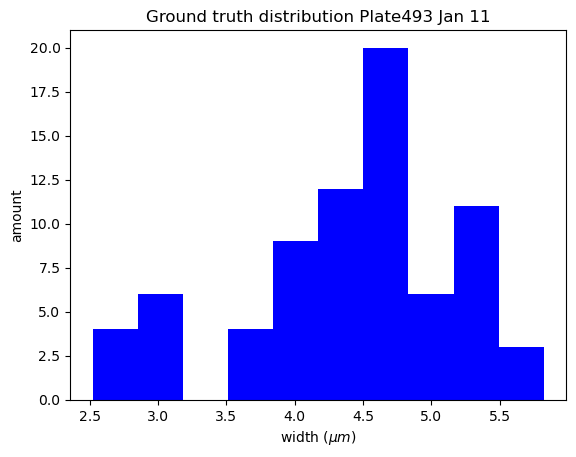

In [16]:
width = [i*2 for i in list(width_dict.values())]
plt.hist(width,color="blue")
plt.title("Ground truth distribution Plate493 Jan 11")
plt.xlabel("width ($\mathit{\mu m}$)")
plt.ylabel("amount")
plt.show()

**Plate description**:\
Plate number 493\
Strain: Agg\
Crossdate: 06/12/23\
Prince position: 24\
Extract date: 13th Jan 2023\
PRINCE FULL DATA: 

In [17]:
segment2 = get_labelme_segments(labelme_path+"20230111_Plate493_2")
width_dict2,width_std_dict2= compute_width_from_segment(segment2)

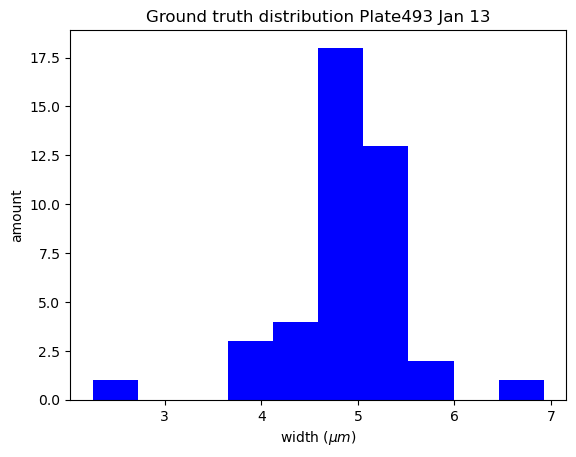

In [18]:
width2 = [i*2 for i in list(width_dict2.values())]
plt.hist(width2,color="blue")
plt.title("Ground truth distribution Plate493 Jan 13")
plt.xlabel("width ($\mathit{\mu m}$)")
plt.ylabel("amount")
plt.show()

In [45]:
dif = {}
for key in width_dict2.keys():
    exp1 = width_dict[key] * 2
    exp2 = width_dict2[key] * 2
    dif[key] = exp2-exp1

hyphae = []
label = []
for i in range(len(dif)+1):
    for key, value in dif.items():
        if len(key[3:]) < 3 :
            if i == int(key[3:]):
                hyphae.append(value)
                label.append(key)
hyphae.insert(0,dif["pos1_top"])
hyphae.insert(0,dif["pos1_bottom"])
hyphae.insert(0,dif["pos1_left"])
label.insert(0,"pos1_top")
label.insert(0,"pos1_bottom")
label.insert(0,"pos1_left")

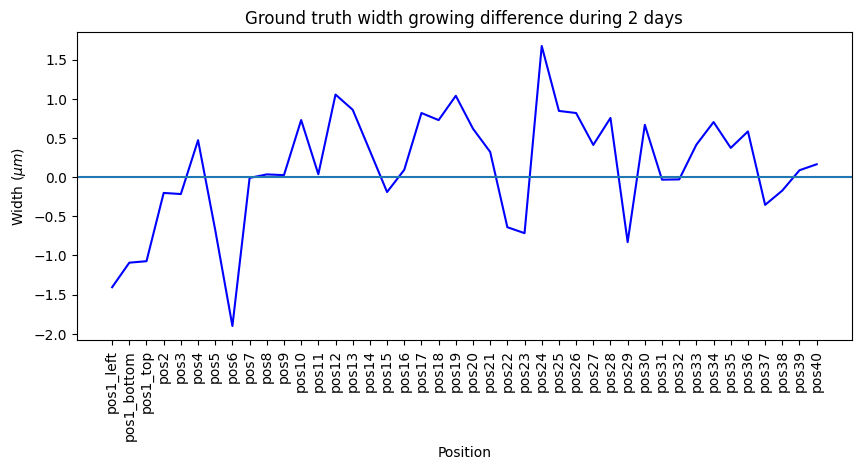

In [46]:
plt.figure(figsize=(10, 4))
plt.plot(hyphae,color="blue")
plt.xticks(np.arange(0,len(label),1),labels=label,rotation = 90)
plt.title("Ground truth width growing difference during 2 days")
plt.xlabel("Position")
plt.ylabel("Width ($\mathit{\mu m}$)")
plt.axhline(0,xmin=0,xmax=40)
plt.savefig("plot_data/width growing/20230111_Plate493_13-11.png")

# Let's check the uncertainty of the extraction.

In [215]:
# 1. select the plate and image randomly
from random import randrange
import os
def random_image_path(plate_path= labelme_path,remove_list=["Fluorescence_ex_Kai-kai_Plate705.xlsx","Fluorescence_ex_Kai-kai_Plate521.xlsx","Fluorescence_ex_Kai-kai_Plate493.xlsx",'20220714_plate_120_groundtruths_close_up']):
    plate_list = os.listdir(plate_path)
    for i in remove_list:
        plate_list.remove(i)
    random_plate = plate_list[randrange(len(plate_list))]
    random_plate_path = os.path.join(plate_path,random_plate)
    random_image_list = os.listdir(random_plate_path)
    random_image =  random_image_list[randrange(len(random_image_list))]
    path = os.path.join(random_plate_path,random_image)
    return path
print(random_image_path())
print(random_image_path())
print(random_image_path())
print(random_image_path())
print(random_image_path())

/home/ipausers/lin/Desktop/Project/Experiment/Labelme/20230111_Plate493_2/pos32.json
/home/ipausers/lin/Desktop/Project/Experiment/Labelme/20230111_Plate493_2/pos8.tiff
/home/ipausers/lin/Desktop/Project/Experiment/Labelme/20230104_Plate521/pos64.tiff
/home/ipausers/lin/Desktop/Project/Experiment/Labelme/Plate705_20221116/pos56.json
/home/ipausers/lin/Desktop/Project/Experiment/Labelme/20230111_Plate493_2/pos39_focus2.json


## I will check the file below for the extraction uncertainity.
/home/ipausers/lin/Desktop/Project/Experiment/Labelme/20230111_Plate493_2/pos32.json\
/home/ipausers/lin/Desktop/Project/Experiment/Labelme/20230111_Plate493_2/pos8.tiff\
/home/ipausers/lin/Desktop/Project/Experiment/Labelme/20230104_Plate521/pos64.tiff\
/home/ipausers/lin/Desktop/Project/Experiment/Labelme/Plate705_20221116/pos56.json\
/home/ipausers/lin/Desktop/Project/Experiment/Labelme/20230111_Plate493_2/pos39_focus2.json

In [53]:
os.path.join(labelme_path,"label_uncertain_check","time1/")

'/home/ipausers/lin/Desktop/Kai/Graduation-Project/Experiment/Labelme/label_uncertain_check/time1/'

In [54]:
def get_labelme_segments(directory):
    # https://github.com/wkentaro/labelme
    labelme_dict = {}
    def load_labelmefile(file):
        with open(file) as r:
            return json.load(r)
    for labelmefiles in os.listdir(directory):
        if ".json" in labelmefiles:
            labelme_path = os.path.join(directory,labelmefiles)
            labelmefile = load_labelmefile(labelme_path)
            for shape in labelmefile["shapes"]:
                if shape["shape_type"] == "line":
                    if shape["label"] in labelme_dict.keys():
                        labelme_dict[shape["label"]].append(shape["points"])
                    else:
                        labelme_dict[shape["label"]]= [shape["points"]]
    return labelme_dict
segment = get_labelme_segments(os.path.join(labelme_path,"label_uncertain_check","time1"))
width_dict,width_std_dict= compute_width_from_segment(segment)

In [55]:
exp_file = os.listdir(os.path.join(labelme_path,"label_uncertain_check"))[-5:]
collect = {}
for file in exp_file:
    segment = get_labelme_segments(os.path.join(labelme_path,"label_uncertain_check",file))
    width_dict,width_std_dict= compute_width_from_segment(segment)
    for key,value in width_dict.items():
        value = np.array(value)*2
        if key in collect.keys():
            collect[key] = np.append(collect[key],value)
        else:
            collect[key] = value

In [56]:
width_mean = []
width_std = []
width_label = []
for index in range(1,len(collect)+1):
    key = "pos"+str(index)
    width_mean.append(np.mean(collect[key]))
    width_std.append(np.std(collect[key]))
    width_label.append(key)

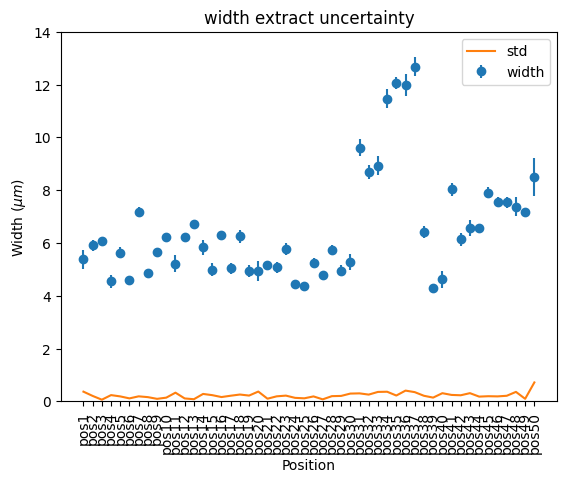

In [58]:
plt.errorbar(width_label,width_mean,width_std,linestyle='None', marker='o',label="width")
plt.plot(width_std,label="std")
plt.xticks(np.arange(0,len(width_label),1),labels=width_label,rotation = 90)
plt.xlabel("Position")
plt.ylabel("Width ($\mathit{\mu m}$)")
plt.ylim(0,14)
plt.legend()
plt.title("width extract uncertainty")
plt.twinx
plt.savefig("plot_data/data extract/width_extract_uncertainty_check.png")

/tmp/ipykernel_2793417/2610404579.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(width_label, rotation=90)


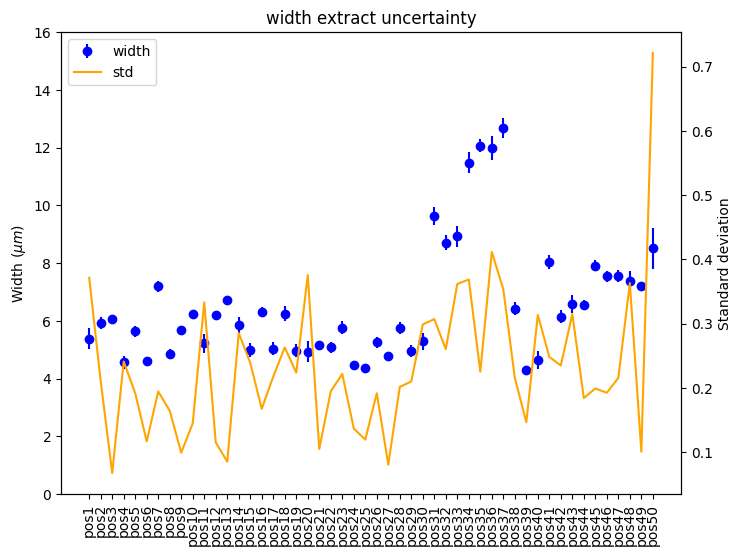

In [59]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
ls1 = ax1.errorbar(width_label,width_mean,width_std,linestyle='None', marker='o',label="width",color="blue")
ls2 = ax2.plot(width_label,width_std,label="std",color="orange")
ax1.set_xticklabels(width_label, rotation=90)
ax1.set_ylim(0,16)
ax1.set_ylabel("Width ($\mathit{\mu m}$)")
ax2.set_ylabel("Standard deviation")
plt.xlabel("Position")
plt.title("width extract uncertainty")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc=2)
plt.savefig("plot_data/data extract/width_extract_uncertainty_check.png")

## edge uncertain check

In [40]:
os.listdir(labelme_path)

['20220714_plate_120_groundtruths_close_up',
 '20230104_Plate521',
 '20230104_Plate521_2',
 '20230104_Plate521_3',
 '20230111_Plate493',
 '20230111_Plate493_2',
 'Fluorescence_ex_Kai-kai_Plate493.xlsx',
 'Fluorescence_ex_Kai-kai_Plate521.xlsx',
 'Fluorescence_ex_Kai-kai_Plate705.xlsx',
 'Plate705_20221116',
 'label_uncertain_check',
 'edge_unceratin_check']

In [66]:
edge_path = os.path.join(labelme_path,"edge_unceratin_check")
segment = get_labelme_segments(edge_path)
width_dict,width_std_dict= compute_width_from_segment(segment)

In [67]:
collect = {}
for index,value in width_dict.items():
    name = "".join(index.split("_")[:-1])
    if name in collect:
        collect[name].append(value)
    else:
        collect[name] = [value]

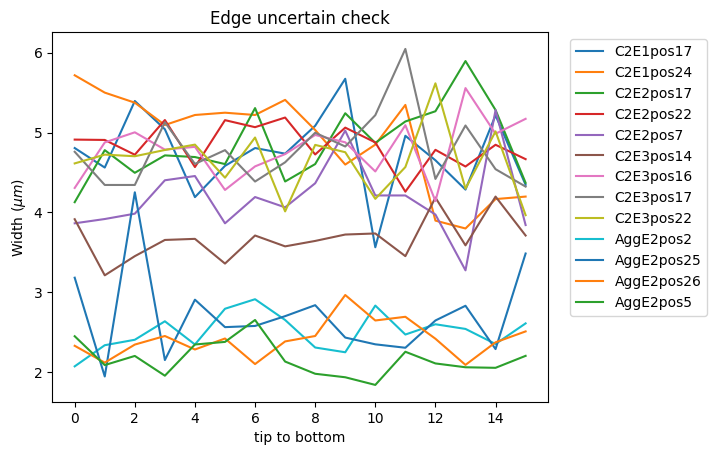

In [43]:
for key, value in collect.items():
    # print(key)
    # print(f'mean is {np.mean(value)}')
    # print(f'std is {np.std(value)}')
    # print(f'max-min = {max(value)-min(value)}')
    # print(f'median is {np.median(value)}')
    plt.plot(value,label = key)
    # plt.axhline(np.median(value))
plt.title("Edge uncertain check")
plt.xlabel("tip to bottom")
plt.ylabel("Width ($\mathit{\mu m}$)")
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.show()

mean is 4.860596181938982
std is 0.4443630341513389
max-min = 1.768608775280729
median is 4.746113378182798


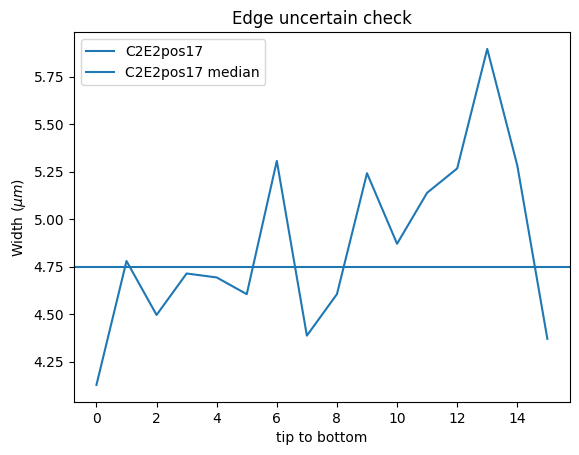

In [44]:
index = 2
edge_select = list(collect.keys())[index]
value = collect[edge_select]
print(f'mean is {np.mean(value)}')
print(f'std is {np.std(value)}')
print(f'max-min = {max(value)-min(value)}')
print(f'median is {np.median(value)}')
plt.plot(value,label = edge_select)
plt.axhline(np.median(value),label = edge_select+" median")
plt.title("Edge uncertain check")
plt.xlabel("tip to bottom")
plt.ylabel("Width ($\mathit{\mu m}$)")
plt.legend()
plt.show()

In [45]:
len(collect.keys())

13

In [68]:
width_label,width_mean,width_std = [],[],[]
for key, value in collect.items():
    width_label.append(key)
    width_mean.append(np.mean(value))
    width_std.append(np.std(value))

Text(0.5, 1.0, 'Edge width uncertainty')

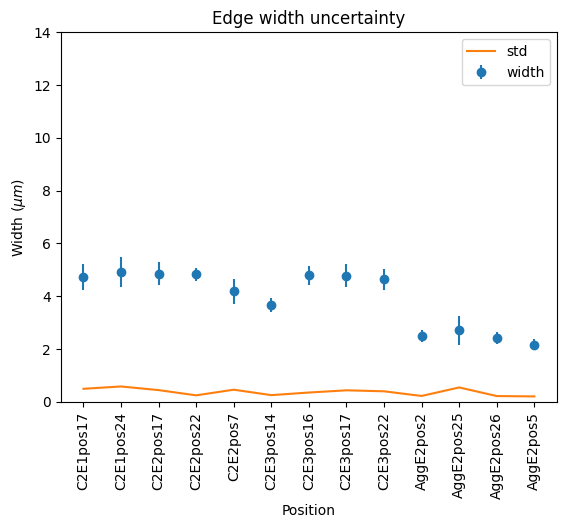

In [69]:
plt.errorbar(width_label,width_mean,width_std,linestyle='None', marker='o',label="width")
plt.plot(width_std,label="std")
plt.xticks(np.arange(0,len(width_label),1),labels=width_label,rotation = 90)
plt.xlabel("Position")
plt.ylabel("Width ($\mathit{\mu m}$)")
plt.ylim(0,14)
plt.legend()
plt.title("Edge width uncertainty")
# plt.savefig("plot_data/data extract/edge_width_uncertainty.png")

/tmp/ipykernel_2793417/3414561317.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(width_label, rotation=90)


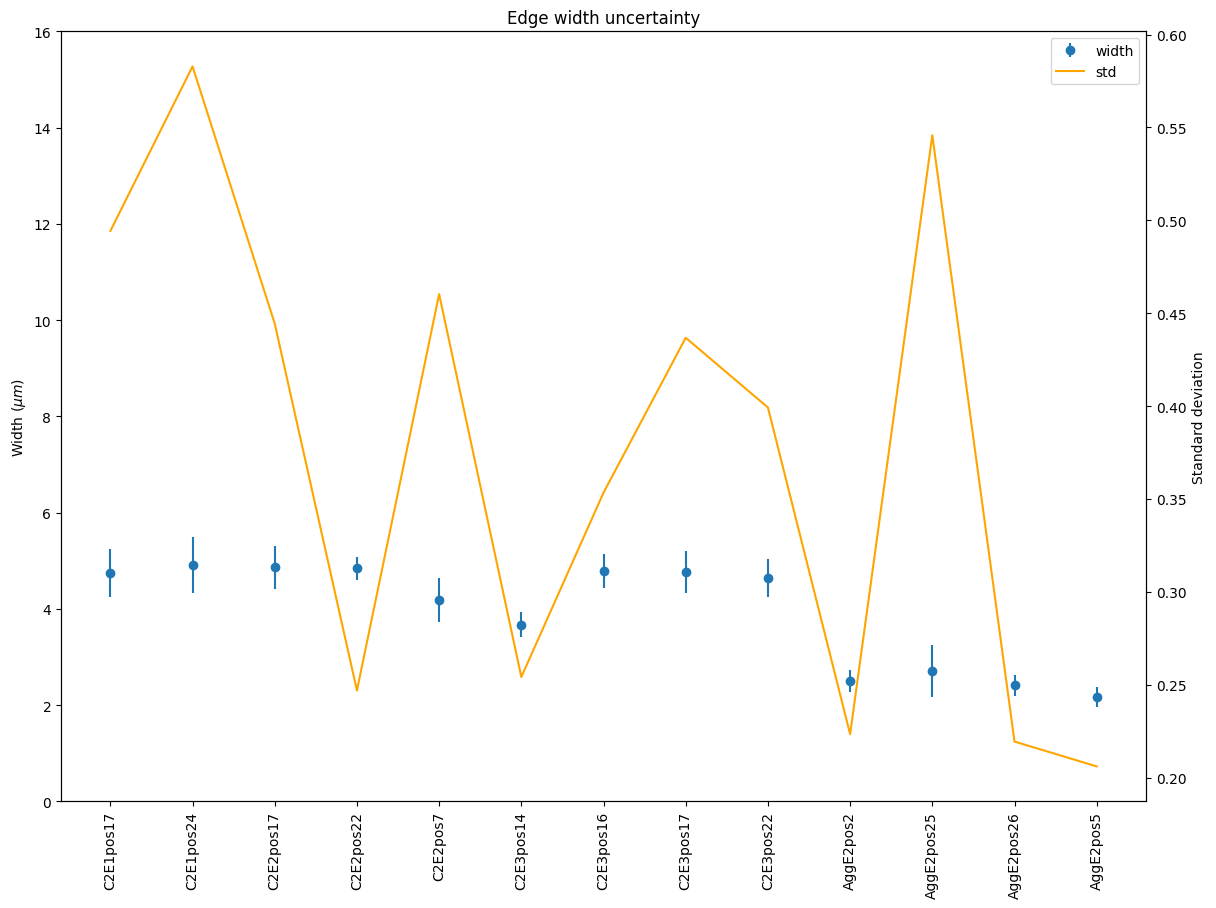

In [73]:
fig, ax1 = plt.subplots(figsize=(14, 10))
ax2 = ax1.twinx()
ls1 = ax1.errorbar(width_label,width_mean,width_std,linestyle='None', marker='o',label="width")
ls2 = ax2.plot(width_label,width_std,label="std",color="orange")
ax1.set_xticklabels(width_label, rotation=90)
ax1.set_ylim(0,16)
ax1.set_ylabel("Width ($\mathit{\mu m}$)")
ax2.set_ylabel("Standard deviation")
plt.xlabel("Position")
plt.title("Edge width uncertainty")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc=1)
plt.savefig("plot_data/data extract/edge_width_uncertainty.png")